In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches

datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
from paramselect import fit
dbf = fit('input.json', datasets)

16 endmembers (5 distinct by symmetry)
ENDMEMBER: ('AL', 'AL', 'AL', 'AL', 'VA')
CPM_FORM: datasets found:  0
SM_FORM: datasets found:  0
HM_FORM: datasets found:  0
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'AL', 'AL', 'NI', 'VA')
CPM_FORM: datasets found:  0
SM_FORM: datasets found:  1
(T,) rss: 0.0 AIC: -inf
HM_FORM: datasets found:  3
(1,) rss: 183525554.0 AIC: 59.0835934239
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'AL', 'NI', 'VA'), ('AL', 'AL', 'NI', 'AL', 'VA'), ('AL', 'NI', 'AL', 'AL', 'VA'), ('NI', 'AL', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'AL', 'NI', 'NI', 'VA')
CPM_FORM: datasets found:  0
SM_FORM: datasets found:  1
(T,) rss: 0.0 AIC: -inf
HM_FORM: datasets found:  2
(1,) rss: 66574260.5 AIC: 38.0276571637
SYMMETRIC_ENDMEMBERS:  [('AL', 'AL', 'NI', 'NI', 'VA'), ('AL', 'NI', 'NI', 'AL', 'VA'), ('NI', 'AL', 'AL', 'NI', 'VA'), ('NI', 'NI', 'AL', 'AL', 'VA')]
ENDMEMBER: ('AL', 'NI', 'NI', 'NI', 'VA')
CPM_FORM: datasets found:  1
(T*log(T),) rss: 5.6

In [3]:
print(dbf.to_string(fmt='tdb'))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$ Date: 2016-01-07 16:13
$ Components: AL, NI, VA
$ Phases: BCC_B2, FCC_L12
$ Generated by rotis (pycalphad 0.2.5+11.g6673af3)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

ELEMENT AL BLANK 0 0 0 !
ELEMENT NI BLANK 0 0 0 !
ELEMENT VA BLANK 0 0 0 !

FUNCTION GHSERAL 298.15 -8.77664E-7*T**3 - 0.001884662*T**2 -
   24.3671976*T*LN(T) + 137.093038*T - 7976.15 + 74092*T**(-1); 700.0 Y
   -5.764227E-6*T**3 + 0.018531982*T**2 - 38.5844296*T*LN(T) + 223.048446*T -
   11276.24 + 74092*T**(-1); 933.47 Y -31.748192*T*LN(T) + 188.684153*T -
   11278.378 - 1.230524E+28*T**(-9); 2900.0 N !
FUNCTION GHSERNI 298.15 -0.0048407*T**2 - 22.096*T*LN(T) + 117.854*T -
   5179.159; 1728.0 Y -43.1*T*LN(T) + 279.135*T - 27840.655 +
   1.12754E+31*T**(-9); 3000.0 N !
FUNCTION GHSERVA 1 0; 10000 N !

TYPE_DEFINITION % SEQ * !
DEFINE_SYSTEM_DEFAULT ELEMENT 2 !
DEFAULT_COMMAND DEFINE_SYSTEM_ELEMENT VA !


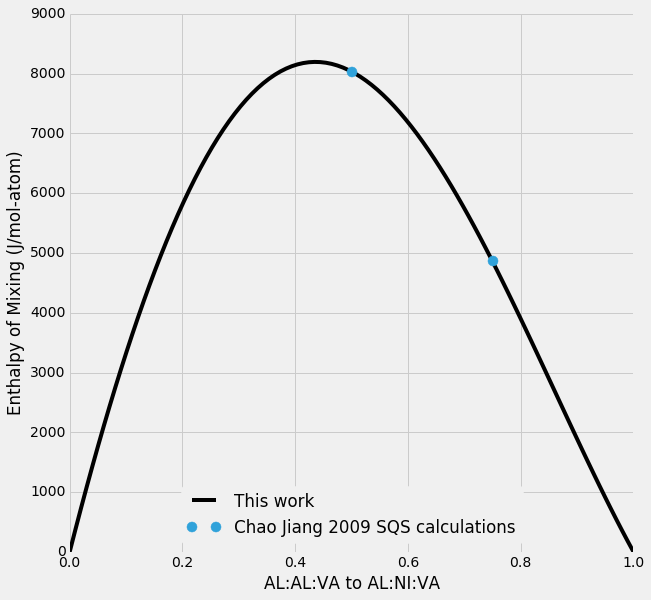

In [4]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", ["AL", "NI"], "VA"], [[0, 1]], datasets)

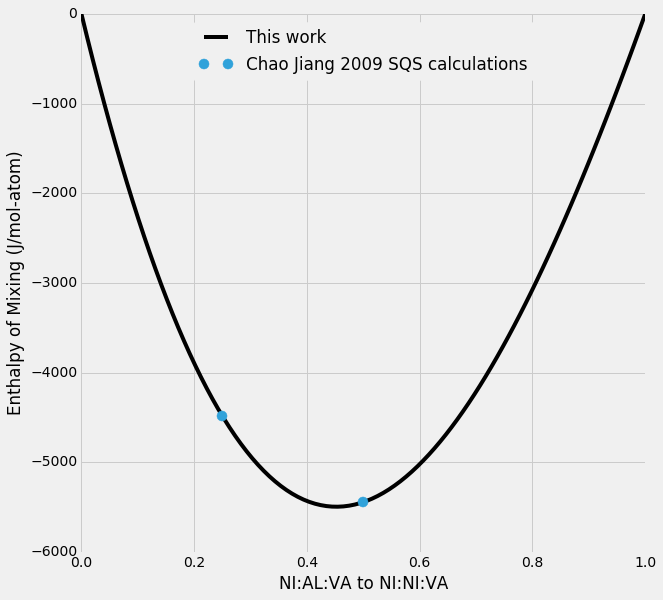

In [5]:
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["NI", ["AL", "NI"], "VA"], [[0, 1]], datasets)

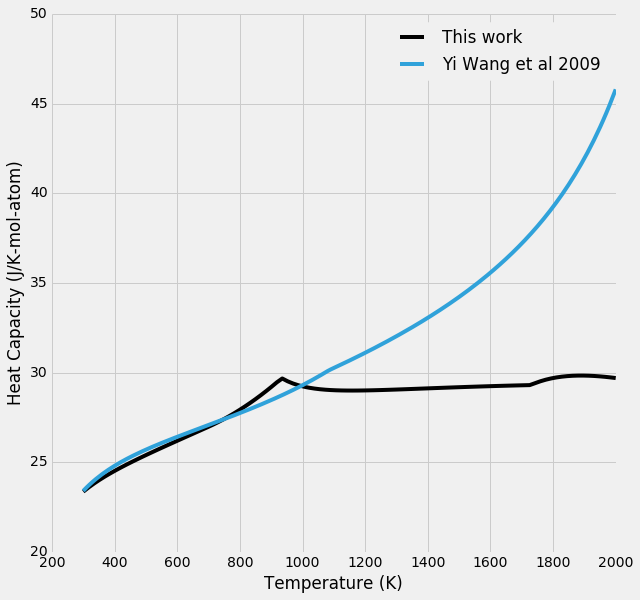

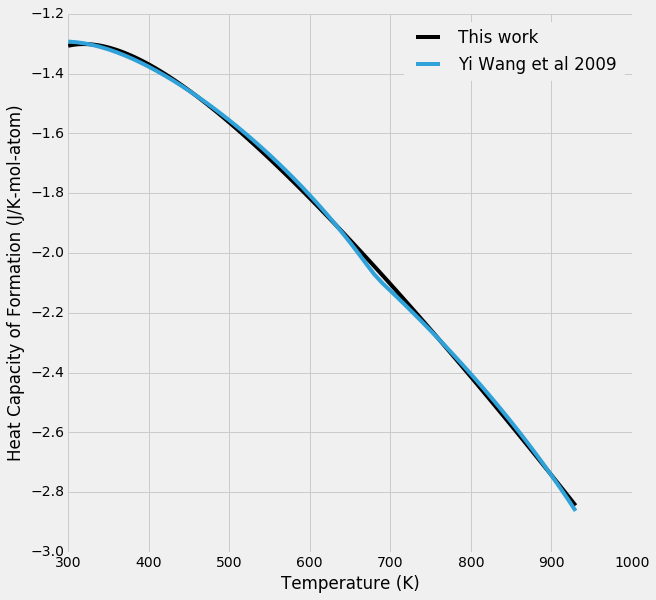

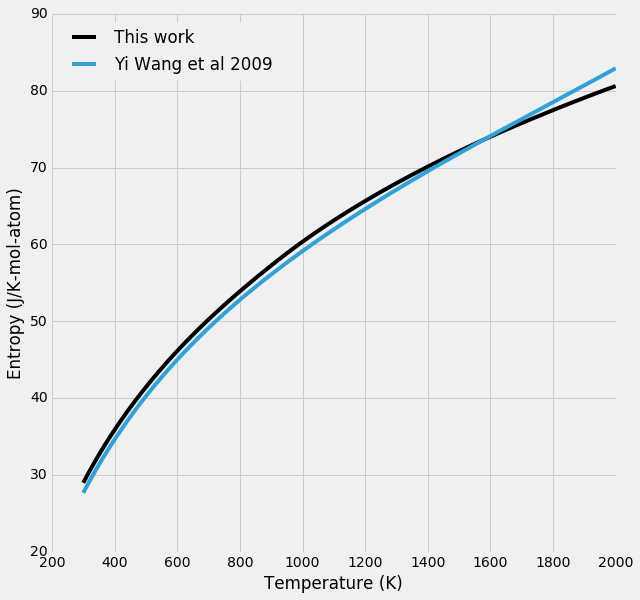

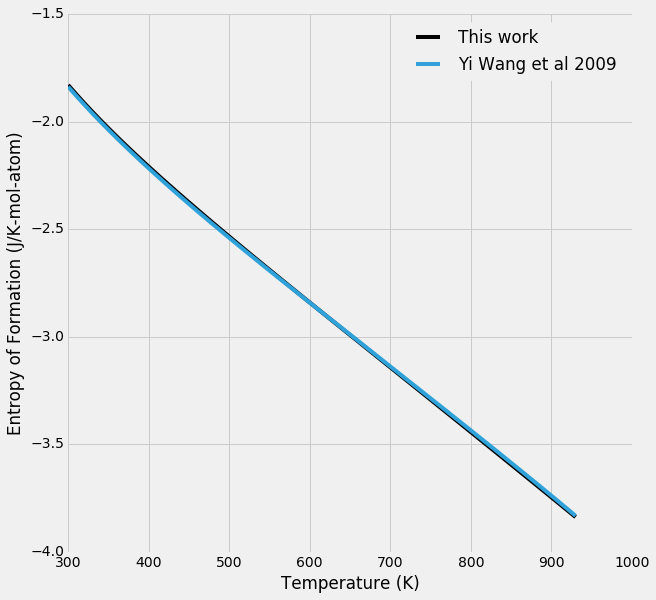

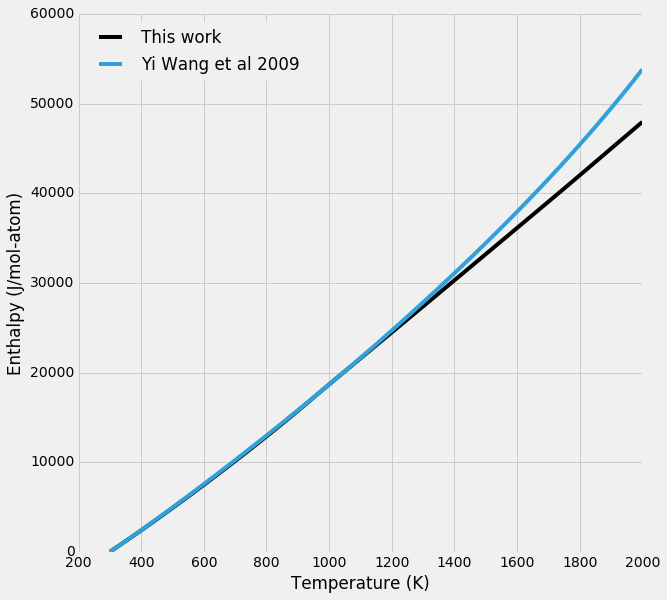

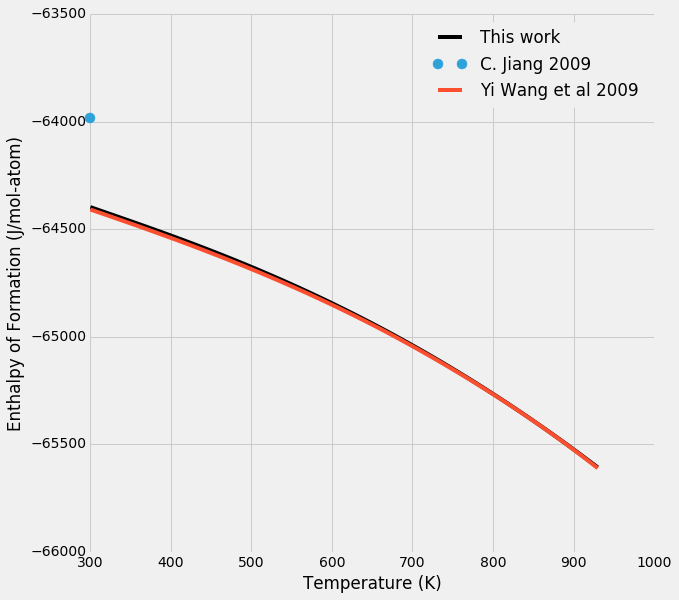

In [6]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "BCC_B2", ["AL", "NI", "VA"], [[0, 1]], datasets)

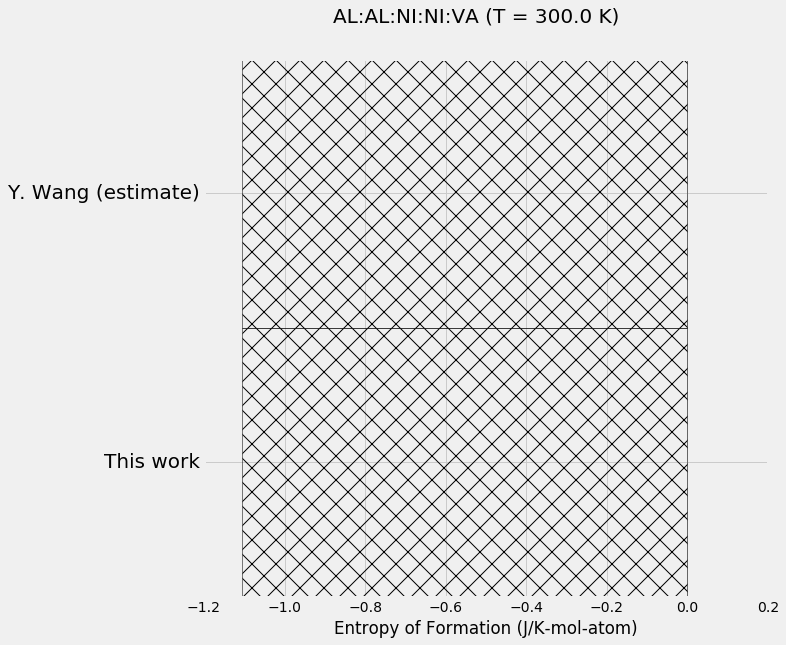

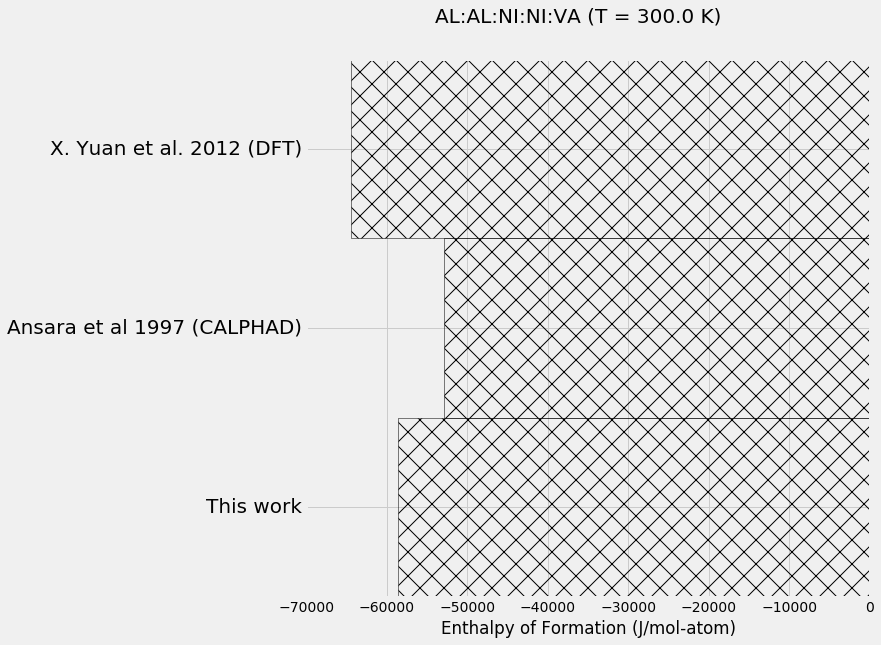

In [7]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", "AL", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

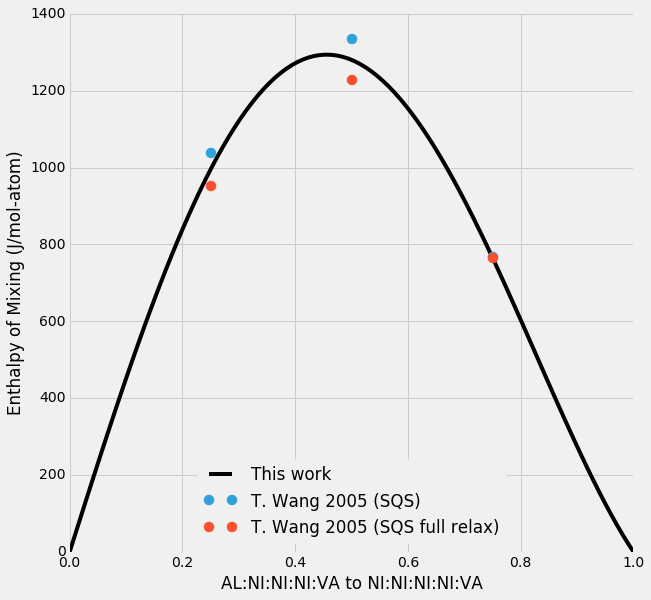

In [8]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "NI", "VA"], [[0,1,2,3]], datasets)

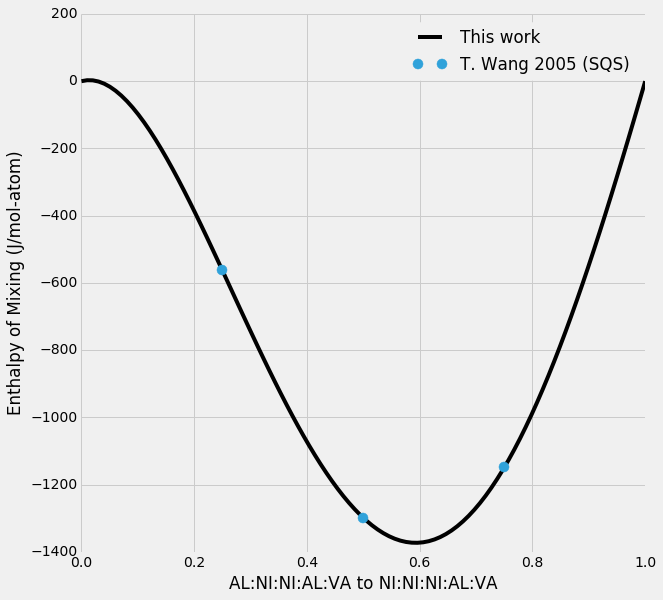

In [9]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "NI", "AL", "VA"], [[0,1,2,3]], datasets)

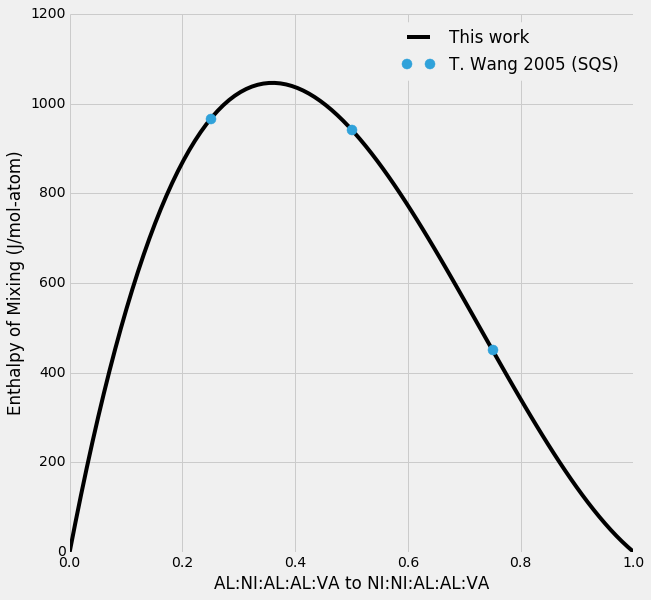

In [10]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", [["AL", "NI"], "NI", "AL", "AL", "VA"], [[0,1,2,3]], datasets)

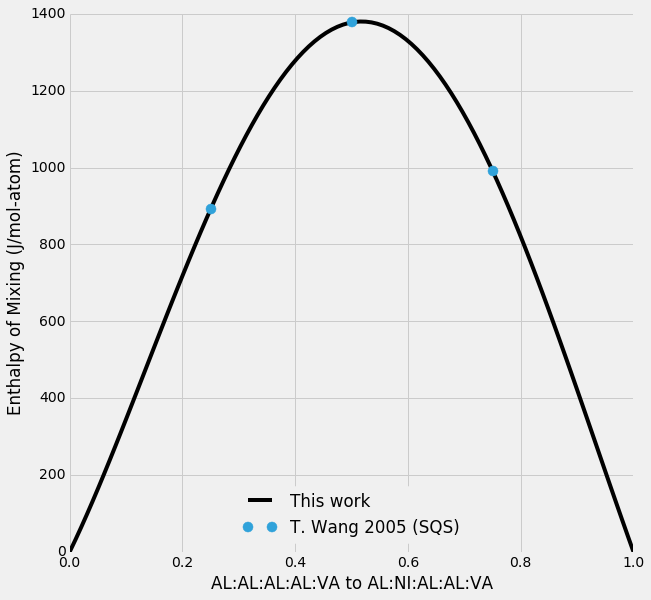

In [11]:
paramselect.plot_parameters(dbf, ["AL", "NI", "VA"], "FCC_L12", ["AL", ["AL", "NI"], "AL", "AL", "VA"], [[0,1,2,3]], datasets)

In [12]:
dbf.to_file('AlNi.tdb', if_exists='overwrite')